In [1]:
import pandas as pd
data = pd.read_csv("supermarket_sales.csv")

In [4]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [5]:
data.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [2]:
data.info

<bound method DataFrame.info of       Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle 

In [6]:
data.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [23]:
data['timestamp'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])

In [28]:
print(data['timestamp'].dt.year.drop_duplicates())
print(data['timestamp'].dt.month.drop_duplicates())

0    2019
Name: timestamp, dtype: int32
0    1
1    3
4    2
Name: timestamp, dtype: int32


In [8]:
member_counts = data['Customer type'].value_counts()
print(member_counts)

Customer type
Member    501
Normal    499
Name: count, dtype: int64


In [20]:
print(data['Product line'].value_counts())

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64


In [10]:
gender = data['Gender'].value_counts()
print(gender)

Gender
Female    501
Male      499
Name: count, dtype: int64


In [11]:
member_gender = data.groupby(['Gender', 'Customer type']).size().reset_index(name='count')
print(member_gender)

   Gender Customer type  count
0  Female        Member    261
1  Female        Normal    240
2    Male        Member    240
3    Male        Normal    259


In [14]:
print(data['City'].unique())

['Yangon' 'Naypyitaw' 'Mandalay']


In [16]:
print(data['City'].value_counts())

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64


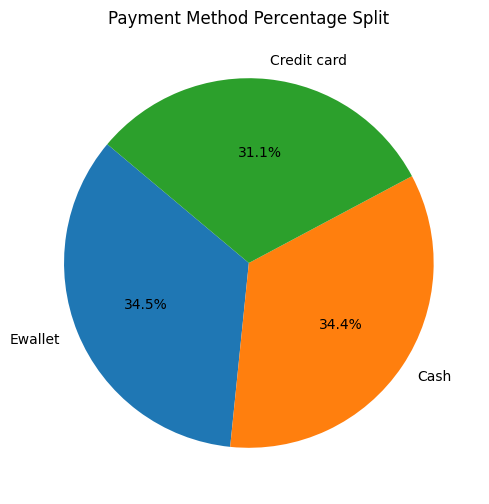

In [19]:
import matplotlib.pyplot as plt
payment_counts = data['Payment'].value_counts(normalize=True) * 100  # Multiply by 100 to get percentages

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Payment Method Percentage Split')
plt.show()